# Week 11 Assignment

Author: Polly Zheng

Date: 2025-11-16

Purpose: Week 11 Assignment

## Project Overview

For this week's assignment, I am exploring **movie popularity and rating trends** using data from the IMDb “most popular movies” list (which was fetched previously via IMDb API and saved as a CSV file in early weeks). So,instead of re-calling the API in this notebook, I work with a **cleaned snapshot** of that data: `movies_popularity_raw.csv`.

This notebook connects directly to my final project by:

- Using Python and data notebooks to **analyze movies over time**
- Telling a **data story** about how popularity and ratings vary by **release year**
- Practicing the same tools (pandas + matplotlib) that I will rely on in the final project

### Guiding questions

In this Week 11 exercise, I focus on a few simple but important questions:

1. **How many “popular” movies come from each release year?**  
2. **How do their average IMDb ratings change by year?**  
3. **Are there years that stand out with more popular movies or noticeably higher/lower ratings?**  

In the cells below, I document my process, decisions, and reflections while working with this dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Make plots appear inline in the notebook
%matplotlib inline

# Slightly larger default size for better visulization
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

## Step 1. Loading the dataset

Once again, in my original script, I called the IMDb API through RapidAPI and saved the results as a CSV file, and for this notebook, I **only** use the saved file `movies_popularity_raw.csv` so that:

- The notebook runs without any API keys or `.env` setup
- Everyone who use the same dataset and scripts can reproduce the analysis easily

Below, I load the CSV and take a quick look at the first few rows.

In [15]:
# Load the pre-saved movie data
df = pd.read_csv("movies_popularity_raw.csv")

# Preview the data structure
df.head(6)

,title,year,rating
0,A House of Dynamite,2025,6.4
1,Weapons,2025,7.5
2,Bugonia,2025,7.7
3,One Battle After Another,2025,8.2
4,Ballad of a Small Player,2025,5.8
5,Frankenstein,2025,7.7


## Step 2. Getting to know the data

Before jumping into plots, I want to understand:

- How many rows I have
- What columns exist
- Whether there are missing values for key fields like `year` and `rating`


In [18]:
# Basic info: columns, types, non-null counts
df.info()
# Summary statistics for numeric columns (especially rating and year)
df.describe()
# Check missingness in the key columns
df[["title", "year", "rating"]].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   100 non-null    object 
 1   year    100 non-null    int64  
 2   rating  95 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


title     0
year      0
rating    5
dtype: int64

## Step 3. Cleaning and filtering

The original script already tried to normalize fields into three main columns:

- `title`: movie title
- `year`: release year (int)
- `rating`: IMDb rating (float, may be missing)

For this notebook, I make a few simple decisions:

- **Drop rows where `year` is missing**, because I cannot place those movies on a time axis.
- Keep movies even if `rating` is missing, but note that they will not contribute to the **average rating by year**.
- Convert `year` to integer.

In short, I mainly care about **how many popular movies** and **their mean rating** per year.

In [25]:
# Drop rows without a valid year
df_clean = df.dropna(subset=["year"]).copy()

# Make sure year is integer
df_clean["year"] = df_clean["year"].astype(int)

# Optional: check how many rows were dropped
len(df), len(df_clean)

df_clean[["title", "year", "rating"]].head(6)

,title,year,rating
0,A House of Dynamite,2025,6.4
1,Weapons,2025,7.5
2,Bugonia,2025,7.7
3,One Battle After Another,2025,8.2
4,Ballad of a Small Player,2025,5.8
5,Frankenstein,2025,7.7


## Step 4. Year-level trends

Now I aggregate the cleaned data by **release year** to answer:

1. How many movies from each year appear in the “most popular” list?
2. What is the **average rating** of those movies for each year?

This is similar to what I implemented in my original Python script, but here the intermediate steps and outputs are documented in the notebook.

In [35]:
# 1. Count of popular movies by release year
movies_per_year = df_clean["year"].value_counts().sort_index()

# 2. Average rating by release year (while ignoring missing ratings)
rating_per_year = df_clean.groupby("year")["rating"].mean()

# Show brief results
movies_per_year.head(), rating_per_year.head()

(year
 1972    1
 1975    1
 1978    1
 1980    1
 1985    1
 Name: count, dtype: int64,
 year
 1972    9.2
 1975    7.4
 1978    7.7
 1980    8.4
 1985    8.5
 Name: rating, dtype: float64)

## Step 5. Visualizing the number of popular movies per year

First, I look at **how many movies** in this “most popular” snapshot come from each release year.

This does **not** tell me how many movies were produced in that year overall.  
Instead, it tells me: within the current “most popular” list, which years are most represented?

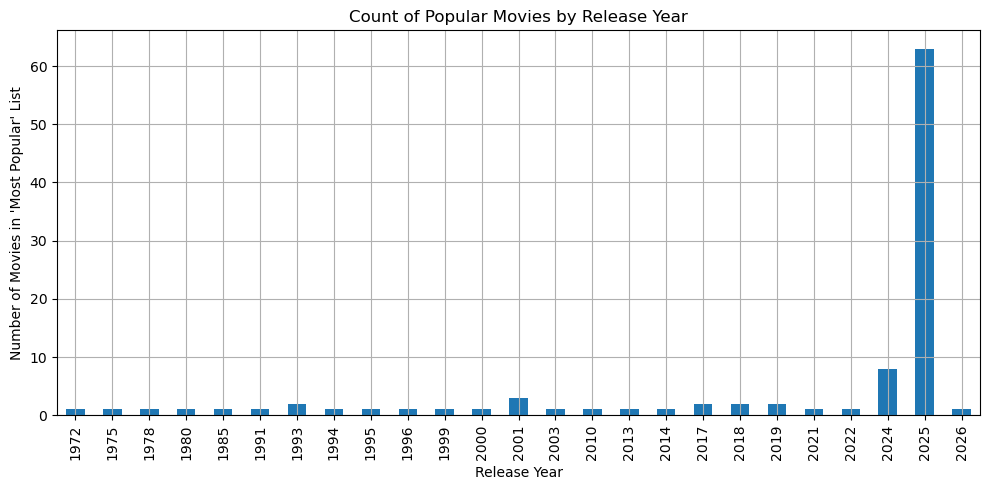

In [39]:
# Bar chart: number of popular movies per year
movies_per_year.plot(kind="bar")

plt.xlabel("Release Year")
plt.ylabel("Number of Movies in 'Most Popular' List")
plt.title("Count of Popular Movies by Release Year")

plt.tight_layout()
plt.show()

## Step 6. Visualizing average rating per year

Next, I examine how the **average IMDb rating** of these popular movies changes by year.

Again, this is not a full historical analysis of every movie, but it can suggest:

- whether more recent “popular” movies are higher or lower rated on average
- whether there are certain years where popular movies cluster with especially high ratings

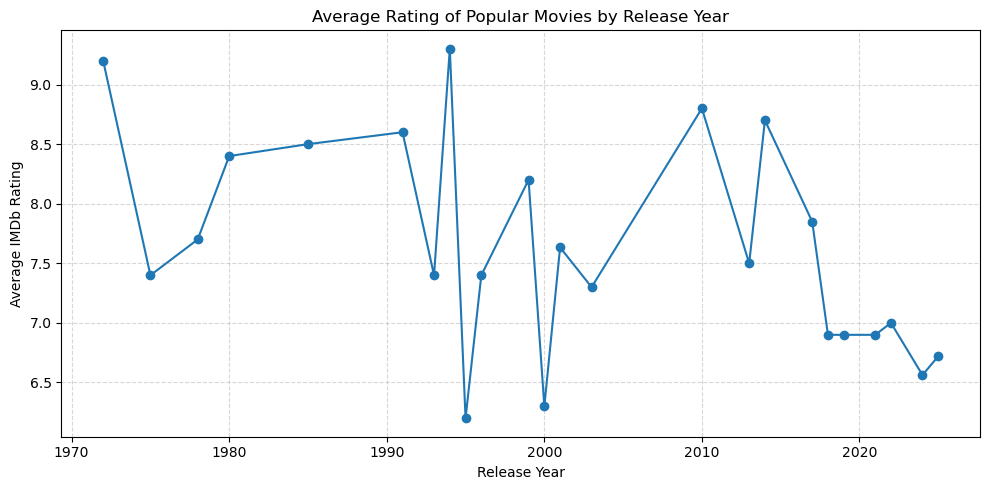

In [42]:
rating_per_year.plot(marker="o")

plt.xlabel("Release Year")
plt.ylabel("Average IMDb Rating")
plt.title("Average Rating of Popular Movies by Release Year")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Step 7. Interpreting the trends

By examining the two visualizations together, a clearer story begins to emerge:

### Popularity is overwhelmingly concentrated in very recent years
- The bar chart shows that almost every year before 2020 contributes only **1–3 movies** to the “most popular” list.
- Starting around **2024**, the number of popular movies increases sharply.
- **2025 dominates the list with more than 60 movies**, far higher than any other year.
- This suggests that the “most popular movies” metric is **strongly biased toward recent releases**, rather than representing popularity over time.

### Ratings do not follow a consistent upward or downward trend
- The line chart shows substantial fluctuation across years rather than a smooth pattern.
- Certain older years (e.g., 1972 and 1994) have exceptionally high ratings near **9.0+**.
- Recent years show **mixed ratings**, and even though 2025 has the most movies, its average rating is only around **6.7–7.0**.
- This indicates that **more movies from a year does not mean higher ratings**.

### Combined interpretation
- The platform’s popularity list does **not** seem to be driven by ratings alone.
- Instead, it is dominated by **recency and current visibility**.
- In other words:

> Being “popular” in this dataset does not necessarily mean “highly rated.” Popularity appears to be driven more by **recency and trending status** than by **critical quality**.


## Step 8. Personal Reflection 

### Using data notebooks

Working in a Jupyter notebook helped me:

- **Break the workflow into steps**: loading data, cleaning, aggregating, and plotting.
- Mix **code and narrative** so that the story is readable for someone who is not inside my head.
- Debug in small chunks: I could run one cell at a time instead of running the whole script blindly.

Compared with writing a standalone `.py` script, this notebook format feels much better for:

- **Communicating my thinking** to audiences, both technical or non-technical
- Experimenting with different plot types or groupings without rewriting everything

### Connection to my final project

I think this week's assignment is a very meaningful slice of my final project:

- I reused the same dataset and basic pipeline from my original script.
- I practiced **grouping and summarizing** by a key variable (`year`), which is similar to how I might later analyze genres, time periods, or other metadata.
- I turned the output into a **data story**, not just a printout of numbers.

In the next steps of my project, I would like to:

- Enrich the dataset with more features (e.g., genres, runtimes, or box office data).
- Explore whether certain **genres** dominate the “most popular” list in different years.
- Try interactive visualizations to let users explore movie trends on their own.